In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
train = pd.read_csv('./data/train.csv', index_col=0)
test = pd.read_csv('./data/test.csv', index_col=0)

In [3]:
train.dropna(inplace=True)

train_X = train.drop(['Is.Back', 'Customer.ID'], axis=1)
test_X = test.drop(['Is.Back', 'Customer.ID'], axis=1)
train_Y = train[['Is.Back']]
test_Y = test[['Is.Back']]

In [4]:
train_X['Date'] = pd.to_datetime(train_X['Date'])
train_X['year'] = train_X['Date'].dt.year
train_X['month'] = train_X['Date'].dt.month
train_X['day'] = train_X['Date'].dt.day
train_X = train_X.drop('Date', axis=1)

test_X['Date'] = pd.to_datetime(test_X['Date'])
test_X['year'] = test_X['Date'].dt.year
test_X['month'] = test_X['Date'].dt.month
test_X['day'] = test_X['Date'].dt.day
test_X = test_X.drop('Date', axis=1)

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
train_X = pd.DataFrame(enc.fit_transform(train_X))
test_X = pd.DataFrame(enc.transform(test_X))

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
dt = DecisionTreeClassifier()

In [8]:
dt.fit(train_X, train_Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [10]:
train_error = (dt.predict(train_X).reshape(-1,1) == train_Y).sum() / len(train_Y)
test_error = (dt.predict(test_X).reshape(-1,1) == test_Y).sum() / len(test_Y)

In [12]:
[train_error, test_error]

[Is.Back    1.0
 dtype: float64, Is.Back    0.713626
 dtype: float64]

<h1> Hyper Parameters Tuning </h1>

In [55]:
train_errors = []
cnt = 0
test_errors = []
depths = range(50, 150, 20)
for depth in depths:
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(train_X, train_Y)
    train_error = ((dt.predict(train_X).reshape(-1,1) == train_Y).sum() / len(train_Y))['Is.Back']
    test_error = ((dt.predict(test_X).reshape(-1,1) == test_Y).sum() / len(test_Y))['Is.Back']
    train_errors.append(train_error)
    test_errors.append(test_error)
    cnt = cnt + 1
    print('\r {} %'.format(int((cnt / len(depths)) * 100)), end='')
    

 20 %

 40 %

 60 %

 80 %

 100 %

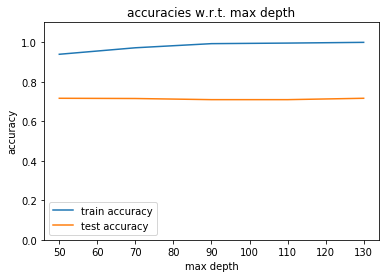

In [57]:
plt.title('accuracies w.r.t. max depth')
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.plot(depths, train_errors, label='train accuracy')
plt.plot(depths, test_errors, label='test accuracy')
# plt.xticks(list(range(50, 200, 30)))
plt.ylim(0,1.1)
plt.legend()

In [61]:
min(train_errors)

0.93855387253501

In [62]:
min(test_errors)

0.7090069284064665